# 상품 리뷰 분석 (NLP)

- word cloud를 통해 중요 단어 확인 
- Naive Bayes 모델을 통해 리뷰의 별점 예측
- Data : Yelp Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('yelp.csv', index_col = 0)

In [3]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2967245 to 838267
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    10000 non-null  object
 1   user_id      10000 non-null  object
 2   business_id  10000 non-null  object
 3   stars        10000 non-null  int64 
 4   date         10000 non-null  object
 5   text         10000 non-null  object
 6   useful       10000 non-null  int64 
 7   funny        10000 non-null  int64 
 8   cool         10000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 781.2+ KB


In [5]:
data.describe()

,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.012800,1.498800,0.464200,0.542500
std,1.724684,6.339355,1.926523,2.010273
min,1.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,0.000000
max,5.000000,533.000000,83.000000,97.000000


In [6]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [7]:
data.drop(['review_id','user_id','business_id','date'], axis =1,inplace=True)

In [8]:
data.head()

,stars,text,useful,funny,cool
2967245,5,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,5,This has become our go-to sushi place. The sus...,0,0,0
1139855,1,I was very disappointed with the hotel. The re...,2,1,1
3997153,5,Love this place - super amazing - staff here i...,0,0,0
4262000,5,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [9]:
len(data.iloc[0]['text'])

347

In [10]:
data['text_length'] = data['text'].apply(len)

In [11]:
data.head()

,stars,text,useful,funny,cool,text_length
2967245,5,LOVE the cheeses here. They are worth the pri...,0,0,1,347
4773684,5,This has become our go-to sushi place. The sus...,0,0,0,377
1139855,1,I was very disappointed with the hotel. The re...,2,1,1,663
3997153,5,Love this place - super amazing - staff here i...,0,0,0,141
4262000,5,Thank you Dana!!!! Having dyed my hair black p...,0,0,0,455


In [12]:
data['stars'].value_counts()

5    7532
1    2468
Name: stars, dtype: int64

C:\Users\MyCom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stars', ylabel='count'>

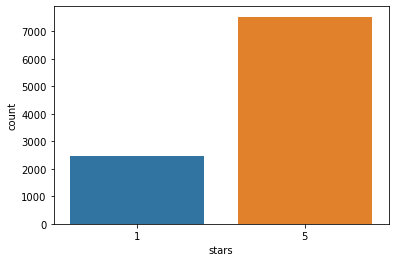

In [13]:
sns.countplot(data['stars'])

C:\Users\MyCom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text_length', ylabel='Density'>

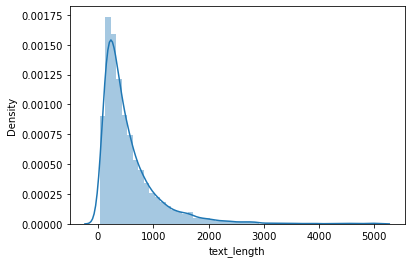

In [14]:
sns.distplot(data['text_length'])

In [15]:
data.corr()

,stars,useful,funny,cool,text_length
stars,1.000000,-0.098825,-0.089860,0.060101,-0.221752
useful,-0.098825,1.000000,0.656630,0.525962,0.161592
funny,-0.089860,0.656630,1.000000,0.741797,0.215003
cool,0.060101,0.525962,0.741797,1.000000,0.193500
text_length,-0.221752,0.161592,0.215003,0.193500,1.000000


<AxesSubplot:>

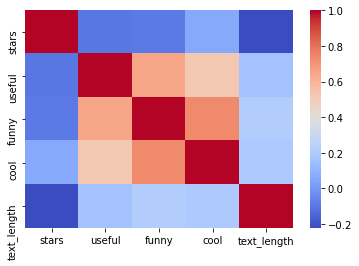

In [16]:
sns.heatmap(data.corr(), cmap = 'coolwarm')

In [17]:
data['text']

2967245    LOVE the cheeses here.  They are worth the pri...
4773684    This has become our go-to sushi place. The sus...
1139855    I was very disappointed with the hotel. The re...
3997153    Love this place - super amazing - staff here i...
4262000    Thank you Dana!!!! Having dyed my hair black p...
                                 ...                        
1567641    I'm a sucker for places like this. Get me in f...
4910763    Extremely rude staff!  Was told 4 min on a lar...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer, then look no...
838267     Awesome food. Awesome beer. Awesome service. N...
Name: text, Length: 10000, dtype: object

In [18]:
import string 

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
s = data.iloc[0]['text']

In [21]:
s

'LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.'

In [22]:
new_s = []
for i in s:
    if i not in string.punctuation:
        new_s.append(i)

In [23]:
new_s

['L',
 'O',
 'V',
 'E',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'c',
 'h',
 'e',
 'e',
 's',
 'e',
 's',
 ' ',
 'h',
 'e',
 'r',
 'e',
 ' ',
 ' ',
 'T',
 'h',
 'e',
 'y',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'w',
 'o',
 'r',
 't',
 'h',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'p',
 'r',
 'i',
 'c',
 'e',
 ' ',
 ' ',
 'G',
 'r',
 'e',
 'a',
 't',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 'f',
 'i',
 'n',
 'd',
 'i',
 'n',
 'g',
 ' ',
 't',
 'r',
 'e',
 'a',
 't',
 's',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 'a',
 ' ',
 's',
 'p',
 'e',
 'c',
 'i',
 'a',
 'l',
 ' ',
 'd',
 'i',
 'n',
 'n',
 'e',
 'r',
 ' ',
 'o',
 'r',
 ' ',
 'p',
 'i',
 'c',
 'n',
 'i',
 'c',
 ' ',
 ' ',
 'N',
 'i',
 'c',
 'e',
 ' ',
 'o',
 'n',
 ' ',
 's',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'd',
 'a',
 'y',
 's',
 ' ',
 'Y',
 'u',
 'm',
 ' ',
 'T',
 'o',
 'p',
 ' ',
 'q',
 'u',
 'a',
 'l',
 'i',
 't',
 'y',
 ' ',
 'm',
 'e',
 'a',
 't',
 's',
 ' ',
 'N',
 'i',
 'c',
 'e',
 ' ',
 's',
 'e',
 'l',
 'e',
 'c',
 't',
 'i',
 'o',
 'n',
 ' ',
 'o',
 'f',
 ' ',
 'n'

In [24]:
''.join(new_s)

'LOVE the cheeses here  They are worth the price  Great for finding treats for a special dinner or picnic  Nice on sample days Yum Top quality meats Nice selection of non brand frozen veggies  Veggie chips are mega tasty  Always quick and friendly check out  Produce not as stellar as it once was but also not finding better in Madison'

In [25]:
def remove_punc(x):
    new_s = []
    for i in x:
        if i not in string.punctuation:
            new_s.append(i)
    new_s = ''.join(new_s)
    return new_s

In [26]:
data['text'].apply(remove_punc)

2967245    LOVE the cheeses here  They are worth the pric...
4773684    This has become our goto sushi place The sushi...
1139855    I was very disappointed with the hotel The res...
3997153    Love this place  super amazing  staff here is ...
4262000    Thank you Dana Having dyed my hair black previ...
                                 ...                        
1567641    Im a sucker for places like this Get me in fro...
4910763    Extremely rude staff  Was told 4 min on a larg...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer then look no ...
838267     Awesome food Awesome beer Awesome service Need...
Name: text, Length: 10000, dtype: object

In [27]:
''.join([i for i in s if i not in string.punctuation])

'LOVE the cheeses here  They are worth the price  Great for finding treats for a special dinner or picnic  Nice on sample days Yum Top quality meats Nice selection of non brand frozen veggies  Veggie chips are mega tasty  Always quick and friendly check out  Produce not as stellar as it once was but also not finding better in Madison'

In [28]:
data['text'] = data['text'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

In [29]:
data.head()

,stars,text,useful,funny,cool,text_length
2967245,5,LOVE the cheeses here They are worth the pric...,0,0,1,347
4773684,5,This has become our goto sushi place The sushi...,0,0,0,377
1139855,1,I was very disappointed with the hotel The res...,2,1,1,663
3997153,5,Love this place super amazing staff here is ...,0,0,0,141
4262000,5,Thank you Dana Having dyed my hair black previ...,0,0,0,455


-텍스트에서 기호 제거하기 

# 상투적인 단어 제거하기

- NLTK (Natural Language ToolKit)

- nltk는 파이썬 자연어 처리 패키지로

  1. Classfication (분류)
  2. Tokenization (단어를 쪼개다)
  3. Stemming(형태소 분석)
  4. tagging (품사를 달다)
  5. parsing (어구를 나누다)
  6. semantic reasoning(의미론적 추리, 이 단어가 어떠한 의미를 가지고 있는지, 문장에서 중요한 의미인지)



- Stopwords are the English words which does not add much meaning to a sentence


In [30]:
from nltk.corpus import stopwords # 불용어 제거

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MyCom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
stopwords.words('english') #영어 불용어 리스트

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
data['text']

2967245    LOVE the cheeses here  They are worth the pric...
4773684    This has become our goto sushi place The sushi...
1139855    I was very disappointed with the hotel The res...
3997153    Love this place  super amazing  staff here is ...
4262000    Thank you Dana Having dyed my hair black previ...
                                 ...                        
1567641    Im a sucker for places like this Get me in fro...
4910763    Extremely rude staff  Was told 4 min on a larg...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer then look no ...
838267     Awesome food Awesome beer Awesome service Need...
Name: text, Length: 10000, dtype: object

In [34]:
s.split()

['LOVE',
 'the',
 'cheeses',
 'here.',
 'They',
 'are',
 'worth',
 'the',
 'price.',
 'Great',
 'for',
 'finding',
 'treats',
 'for',
 'a',
 'special',
 'dinner',
 'or',
 'picnic.',
 'Nice',
 'on',
 'sample',
 'days.',
 'Yum!!!',
 'Top',
 'quality',
 'meats.',
 'Nice',
 'selection',
 'of',
 'non',
 'brand',
 'frozen',
 'veggies.',
 'Veggie',
 'chips',
 'are',
 'mega',
 'tasty.',
 'Always',
 'quick',
 'and',
 'friendly',
 'check',
 'out.',
 'Produce',
 'not',
 'as',
 'stellar',
 'as',
 'it',
 'once',
 'was,',
 'but',
 'also',
 'not',
 'finding',
 'better',
 'in',
 'Madison.']

In [35]:
s.lower() #대문자가 소문자로 변경됨

'love the cheeses here.  they are worth the price.  great for finding treats for a special dinner or picnic.  nice on sample days. yum!!! top quality meats. nice selection of non brand frozen veggies.  veggie chips are mega tasty.  always quick and friendly check out.  produce not as stellar as it once was, but also not finding better in madison.'

In [36]:
def stop_w(x):
    new_s =[]
    for i in x.split():
        if i.lower() not in stopwords.words('english'):
            new_s.append(i.lower())
    return new_s

In [37]:
new_s

['L',
 'O',
 'V',
 'E',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'c',
 'h',
 'e',
 'e',
 's',
 'e',
 's',
 ' ',
 'h',
 'e',
 'r',
 'e',
 ' ',
 ' ',
 'T',
 'h',
 'e',
 'y',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'w',
 'o',
 'r',
 't',
 'h',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'p',
 'r',
 'i',
 'c',
 'e',
 ' ',
 ' ',
 'G',
 'r',
 'e',
 'a',
 't',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 'f',
 'i',
 'n',
 'd',
 'i',
 'n',
 'g',
 ' ',
 't',
 'r',
 'e',
 'a',
 't',
 's',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 'a',
 ' ',
 's',
 'p',
 'e',
 'c',
 'i',
 'a',
 'l',
 ' ',
 'd',
 'i',
 'n',
 'n',
 'e',
 'r',
 ' ',
 'o',
 'r',
 ' ',
 'p',
 'i',
 'c',
 'n',
 'i',
 'c',
 ' ',
 ' ',
 'N',
 'i',
 'c',
 'e',
 ' ',
 'o',
 'n',
 ' ',
 's',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'd',
 'a',
 'y',
 's',
 ' ',
 'Y',
 'u',
 'm',
 ' ',
 'T',
 'o',
 'p',
 ' ',
 'q',
 'u',
 'a',
 'l',
 'i',
 't',
 'y',
 ' ',
 'm',
 'e',
 'a',
 't',
 's',
 ' ',
 'N',
 'i',
 'c',
 'e',
 ' ',
 's',
 'e',
 'l',
 'e',
 'c',
 't',
 'i',
 'o',
 'n',
 ' ',
 'o',
 'f',
 ' ',
 'n'

In [38]:
data['text'].apply(stop_w)

2967245    [love, cheeses, worth, price, great, finding, ...
4773684    [become, goto, sushi, place, sushi, always, fr...
1139855    [disappointed, hotel, restaurants, good, booke...
3997153    [love, place, super, amazing, staff, always, f...
4262000    [thank, dana, dyed, hair, black, previously, k...
                                 ...                        
1567641    [im, sucker, places, like, get, front, meat, c...
4910763    [extremely, rude, staff, told, 4, min, large, ...
1036315    [live, nyc, went, rtr, flatiron, didnt, select...
555962     [looking, trainer, look, moment, humberto, met...
838267     [awesome, food, awesome, beer, awesome, servic...
Name: text, Length: 10000, dtype: object

In [39]:
data['text'] = data['text'].apply(lambda x: [i.lower() for i in x.split() if i.lower() not in stopwords.words('english')])

In [40]:
data.head()

,stars,text,useful,funny,cool,text_length
2967245,5,"[love, cheeses, worth, price, great, finding, ...",0,0,1,347
4773684,5,"[become, goto, sushi, place, sushi, always, fr...",0,0,0,377
1139855,1,"[disappointed, hotel, restaurants, good, booke...",2,1,1,663
3997153,5,"[love, place, super, amazing, staff, always, f...",0,0,0,141
4262000,5,"[thank, dana, dyed, hair, black, previously, k...",0,0,0,455


In [41]:
word_split = []

for i in range(len(data)):
    for j in data.iloc[i]['text']:
        word_split.append(j)
    

In [42]:
len(word_split)

542773

In [43]:
from nltk.probability import FreqDist

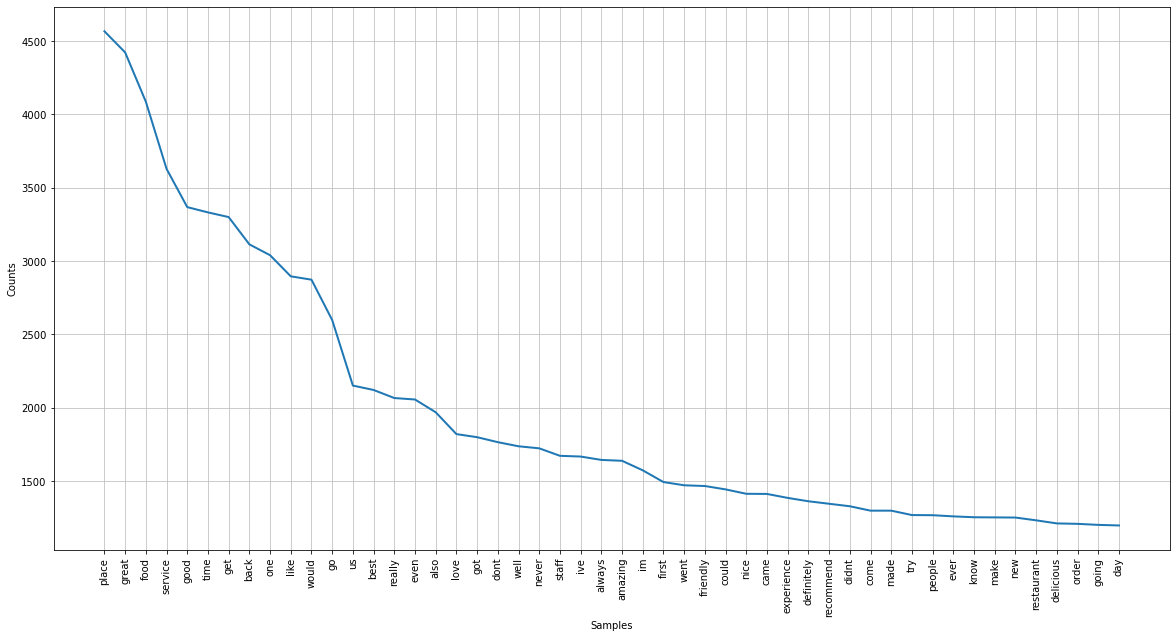

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [44]:
plt.figure(figsize=(20,10))
FreqDist(word_split).plot(50)

In [45]:
from wordcloud import WordCloud

In [46]:
data['text']

2967245    [love, cheeses, worth, price, great, finding, ...
4773684    [become, goto, sushi, place, sushi, always, fr...
1139855    [disappointed, hotel, restaurants, good, booke...
3997153    [love, place, super, amazing, staff, always, f...
4262000    [thank, dana, dyed, hair, black, previously, k...
                                 ...                        
1567641    [im, sucker, places, like, get, front, meat, c...
4910763    [extremely, rude, staff, told, 4, min, large, ...
1036315    [live, nyc, went, rtr, flatiron, didnt, select...
555962     [looking, trainer, look, moment, humberto, met...
838267     [awesome, food, awesome, beer, awesome, servic...
Name: text, Length: 10000, dtype: object

(-0.5, 399.5, 199.5, -0.5)

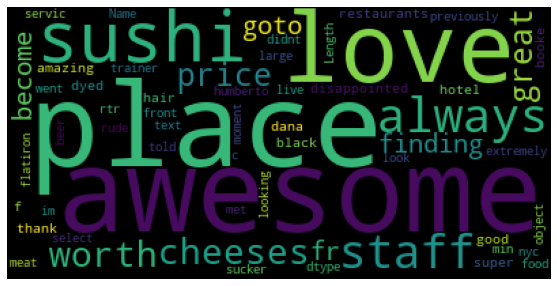

In [47]:
wc = WordCloud().generate(str(data['text']))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off') # x축,y축 제거하기

In [48]:
data['stars'].value_counts()

5    7532
1    2468
Name: stars, dtype: int64

In [49]:
good = data[data['stars'] == 5]['text']
bad = data[data['stars'] == 1]['text']

(-0.5, 399.5, 199.5, -0.5)

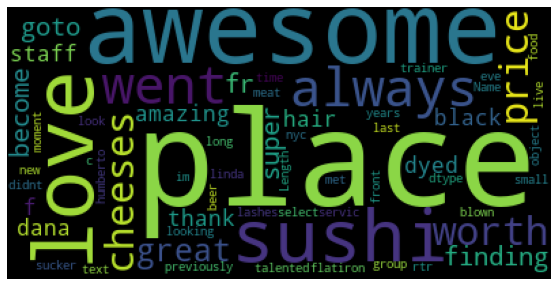

In [50]:
wc = WordCloud().generate(str(good))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off') # x축,y축 제거하기

(-0.5, 399.5, 199.5, -0.5)

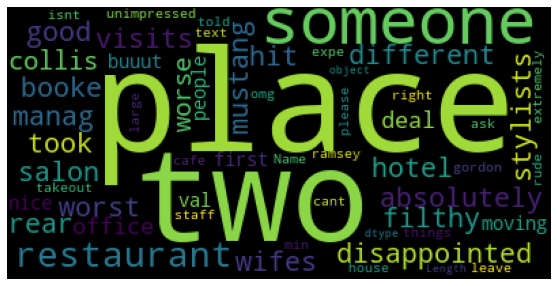

In [51]:
wc = WordCloud().generate(str(bad))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off') # x축,y축 제거하기

- word cloud

 1.Finding Pain Points
    :불만사항이 적힌 텍스트들에서 주로 어떤 사항이 불만요소로 나오는지 확인
    
 2.SEO
    :관련된 주요 키워드를 확인하여,사이트를 검색 결과에 더욱 잘 노출시키도록 개선 

- Count Vectorizer 

 1.단어별 빈도를 계산하여 데이터 프레임으로 정리
    